In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline
#Importing all required Packages 

In [53]:
data = pd.read_csv("911.csv")  #Loading the dataset to data variable 
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [4]:
data = data.drop(['e'],axis=1) # Dropping e column from dataset 
data.head() # First five records of the dataset

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [5]:
data.shape # Number of rows with number of columns with null values

(289240, 8)

In [6]:
df = data.dropna() # Removal of null values from dataset
df.shape

(253897, 8)

In [7]:
df = df.drop_duplicates() # Removal of duplicate data from dataset
df.shape

(253843, 8)

In [8]:
df['zip'].value_counts().head() #Top five zip codes from which most number of emergency calls were made

19401.0    19805
19464.0    19274
19403.0    14519
19446.0    13937
19406.0     9596
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head() #Top five Towns from which most number of emergency calls were made 

LOWER MERION    21089
ABINGTON        17012
NORRISTOWN      15753
POTTSTOWN       11790
CHELTENHAM      11566
Name: twp, dtype: int64

In [10]:
df['title'].nunique() # Number of Unique purpose of emergency calls 

129

In [11]:
Reason = df['title'].apply(lambda title : title.split(':')[0]) # Splitting the value from title column based on colon 
Reason.value_counts() # Top emergency calls from 3 Reasons 

EMS        131384
Traffic     84747
Fire        37712
Name: title, dtype: int64

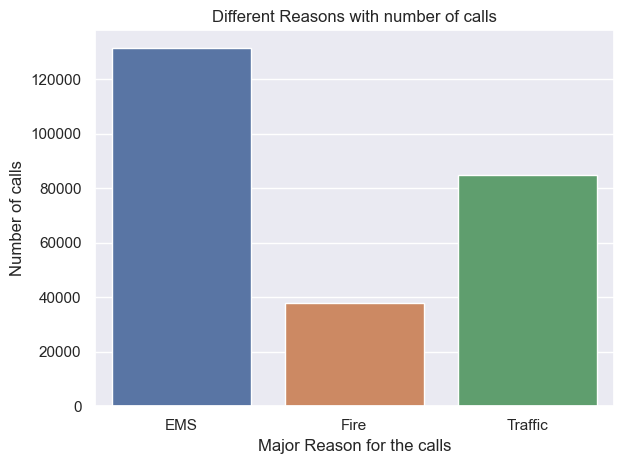

In [12]:
sns.countplot(x=Reason,data=df)
plt.xlabel("Major Reason for the calls") 
plt.ylabel("Number of calls")
plt.title("Different Reasons with number of calls")
plt.tight_layout()

In [13]:
temp = df['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[1]) # Splitting the value timestamp with a single white space
Hour = temp.apply(lambda temp:temp.split(':')[0]) # Splitting the value time with a single colon 
Hour

0         17
1         17
2         14
3         16
5         15
          ..
289231    11
289234    11
289237    11
289238    11
289239    11
Name: timeStamp, Length: 253843, dtype: object

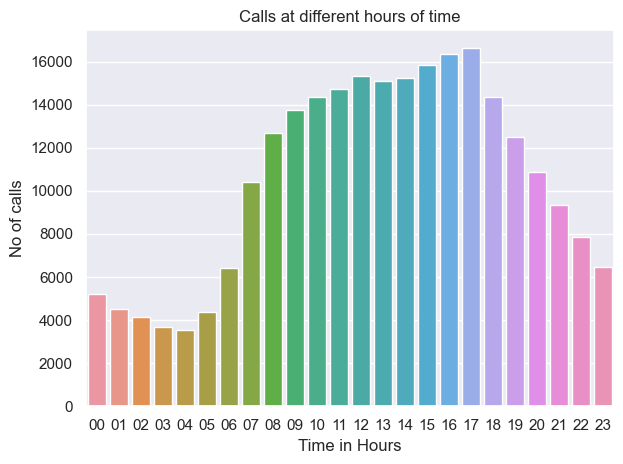

In [14]:
hour = np.sort(Hour)   
sns.countplot(x=hour)      
plt.xlabel("Time in Hours")
plt.ylabel("No of calls")
plt.title("Calls at different hours of time")
plt.tight_layout()

In [15]:
time = df['timeStamp']
year = df['timeStamp'].apply(lambda time:time.split('-')[2])
updateYear = year.apply(lambda year:year.split(' ')[0])
updateYear

0         2015
1         2015
2         2015
3         2015
5         2015
          ... 
289231    2017
289234    2017
289237    2017
289238    2017
289239    2017
Name: timeStamp, Length: 253843, dtype: object

In [16]:
date_time= pd.to_datetime(df['timeStamp']) #Converting from string to Date Time format 
type(date_time[0])        

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
Month = date_time.apply(lambda x:x.month) # Retrieving month data from date_time object 
Month

0         10
1         10
2         10
3         10
5         10
          ..
289231    12
289234    12
289237    12
289238    12
289239    12
Name: timeStamp, Length: 253843, dtype: int64

In [18]:
dayOfWeek = date_time.apply(lambda x:x.dayofweek)  # Retrieving day of the week  data from date_time object
dmap = {0:'Mon',1:'Tues',2:'Wed',3:'Thur',4:'Frid',5:'Sat',6:'Sun'} # Dictionary of names of the day with integer key values
day= dayOfWeek.map(dmap)  # Map function 
day

0         Mon
1         Mon
2         Mon
3         Mon
5         Mon
         ... 
289231    Sat
289234    Sat
289237    Sat
289238    Sat
289239    Sat
Name: timeStamp, Length: 253843, dtype: object

Text(0.5, 1.0, 'Calls made at different days of the week')

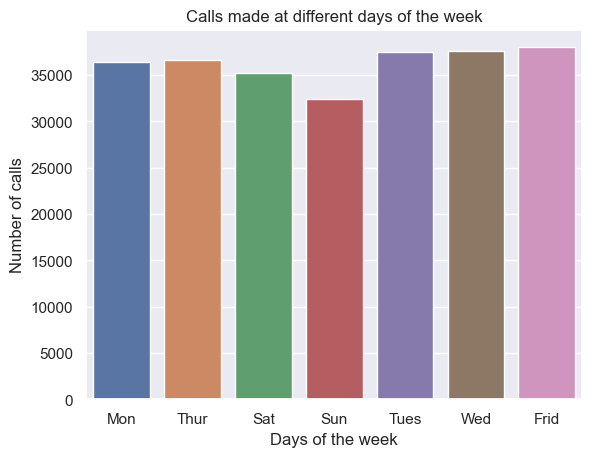

In [19]:
plt.tight_layout()
sns.countplot(x=day,data = df)
plt.xlabel("Days of the week")
plt.ylabel("Number of calls")
plt.title("Calls made at different days of the week")

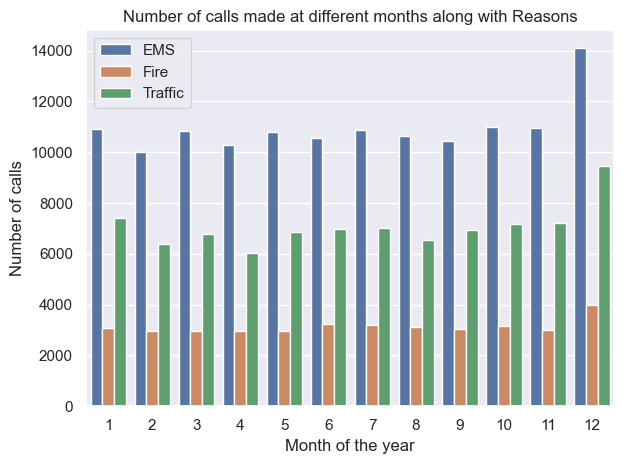

In [20]:
sns.countplot(x=Month,hue=Reason)
plt.legend(loc="upper left")
plt.xlabel("Month of the year")
plt.ylabel("Number of calls")
plt.title("Number of calls made at different months along with Reasons")
plt.tight_layout()

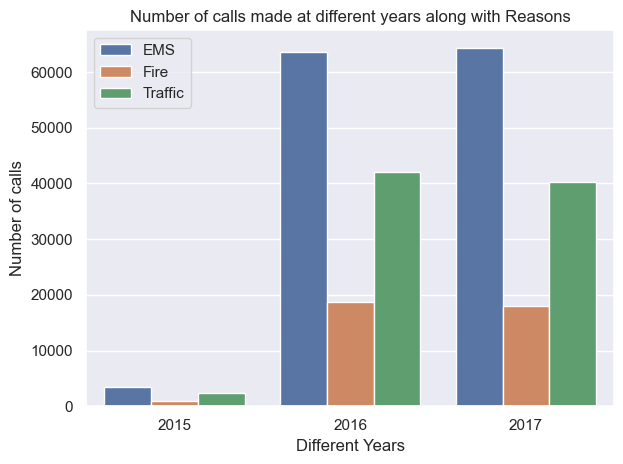

In [21]:
sns.countplot(x=updateYear,hue=Reason)
plt.legend(loc="upper left")
plt.xlabel("Different Years")
plt.ylabel("Number of calls")
plt.title("Number of calls made at different years along with Reasons")
plt.tight_layout()

In [22]:
df['Month'] = date_time.apply(lambda x:x.month)
bymonth = df.groupby('Month').count()

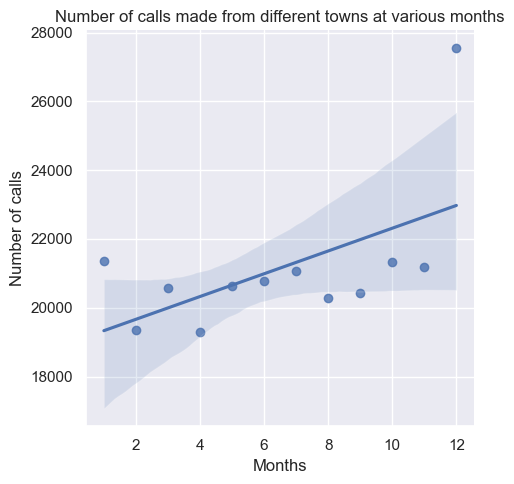

In [23]:
sns.lmplot(x='Month',y='twp',data = bymonth.reset_index())
plt.xlabel("Months")
plt.ylabel("Number of calls")
plt.title("Number of calls made from different towns at various months")
plt.tight_layout()

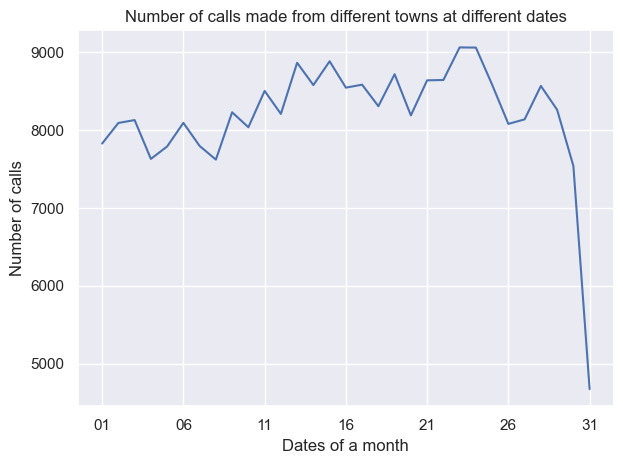

In [24]:
Date = df['timeStamp'].apply(lambda timeStamp:timeStamp.split('-')[0])
df.groupby(Date).count()['twp'].plot()
plt.xlabel("Dates of a month")
plt.ylabel("Number of calls")
plt.title("Number of calls made from different towns at different dates")
plt.tight_layout()

In [33]:
df[['category','sub_category']] = df.title.str.split(':',expand=True) # Splitting the title as category and subcategory
df['sub_category'] = df['sub_category'].str.replace(" -","") #Replacing "-" with empty space
((df['sub_category'].value_counts()/len(df['sub_category']))*100).head(30) # No of calls of first 30 sub category in percentage

 VEHICLE ACCIDENT             26.949729
 DISABLED VEHICLE              6.367715
 FIRE ALARM                    6.064378
 RESPIRATORY EMERGENCY         5.434855
 FALL VICTIM                   5.409643
 CARDIAC EMERGENCY             5.330460
 SUBJECT IN PAIN               3.025886
 HEAD INJURY                   2.844278
 ROAD OBSTRUCTION              2.737125
 SYNCOPAL EPISODE              1.839720
 UNKNOWN MEDICAL EMERGENCY     1.831447
 SEIZURES                      1.758173
 GENERAL WEAKNESS              1.710900
 ALTERED MENTAL STATUS         1.558838
 ABDOMINAL PAINS               1.536777
 MEDICAL ALERT ALARM           1.508019
 FIRE INVESTIGATION            1.482412
 HEMORRHAGING                  1.368956
 UNCONSCIOUS SUBJECT           1.346108
 CVA/STROKE                    1.343350
 OVERDOSE                      1.340986
 NAUSEA/VOMITING               1.262985
 GAS-ODOR/LEAK                 1.119196
 BUILDING FIRE                 1.019134
 CARDIAC ARREST                0.959254


Text(0.5, 1.0, 'No of calls made by different sub categories')

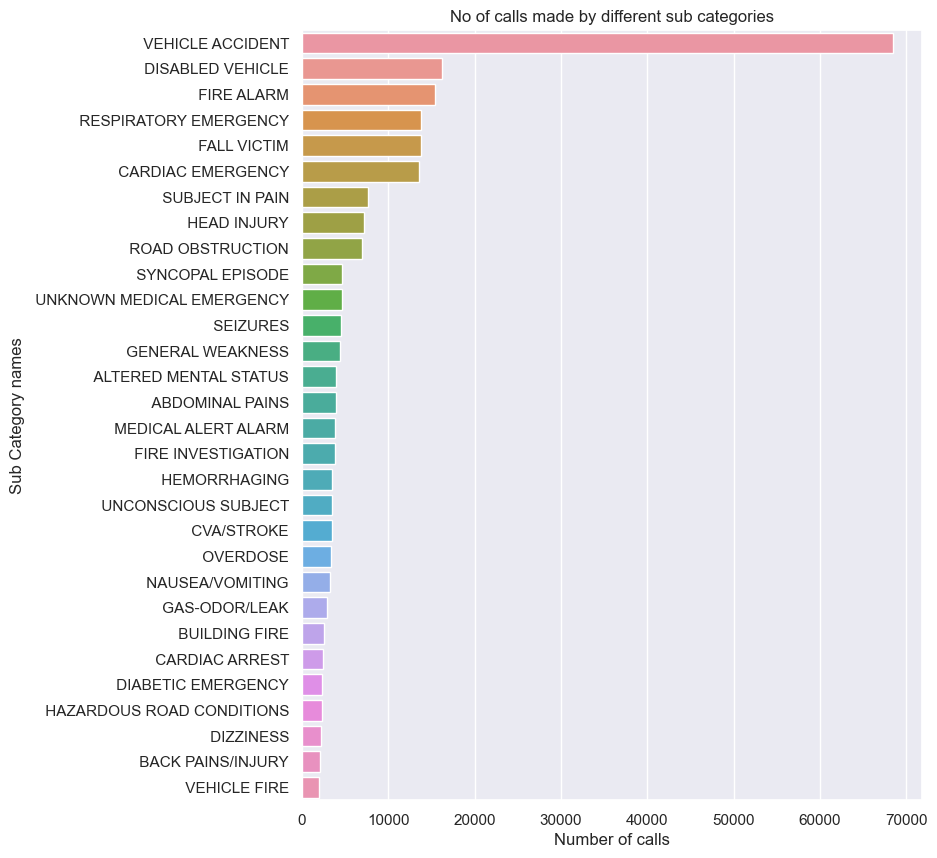

In [35]:
plt.figure(figsize=(8,10)) #Adjusting the size of the chart
sns.countplot(y ='sub_category', data = df, order=df['sub_category'].value_counts().iloc[:30].index)
plt.xlabel("Number of calls")
plt.ylabel("Sub Category names")
plt.title("No of calls made by first 30 sub categories")

In [36]:
EMS = df[df['category']=='EMS']['sub_category']
(EMS.value_counts()/len(EMS)*100).head(30)  # First 30 Emergency situations in percentage 

 RESPIRATORY EMERGENCY        10.499756
 FALL VICTIM                  10.448761
 CARDIAC EMERGENCY            10.296535
 SUBJECT IN PAIN               5.844700
 VEHICLE ACCIDENT              5.560038
 HEAD INJURY                   5.495342
 SYNCOPAL EPISODE              3.552944
 UNKNOWN MEDICAL EMERGENCY     3.538483
 SEIZURES                      3.396913
 GENERAL WEAKNESS              3.305578
 ALTERED MENTAL STATUS         3.011782
 ABDOMINAL PAINS               2.969159
 MEDICAL ALERT ALARM           2.911313
 HEMORRHAGING                  2.644919
 UNCONSCIOUS SUBJECT           2.600012
 CVA/STROKE                    2.595445
 OVERDOSE                      2.590118
 NAUSEA/VOMITING               2.439414
 DIABETIC EMERGENCY            1.772666
 DIZZINESS                     1.626530
 BACK PAINS/INJURY             1.571729
 CARDIAC ARREST                1.526822
 FRACTURE                      1.341868
 ASSAULT VICTIM                1.312184
 UNRESPONSIVE SUBJECT          1.048834


Text(0.5, 1.0, 'Number of Respiratory Emergency calls made at first 30 different towns')

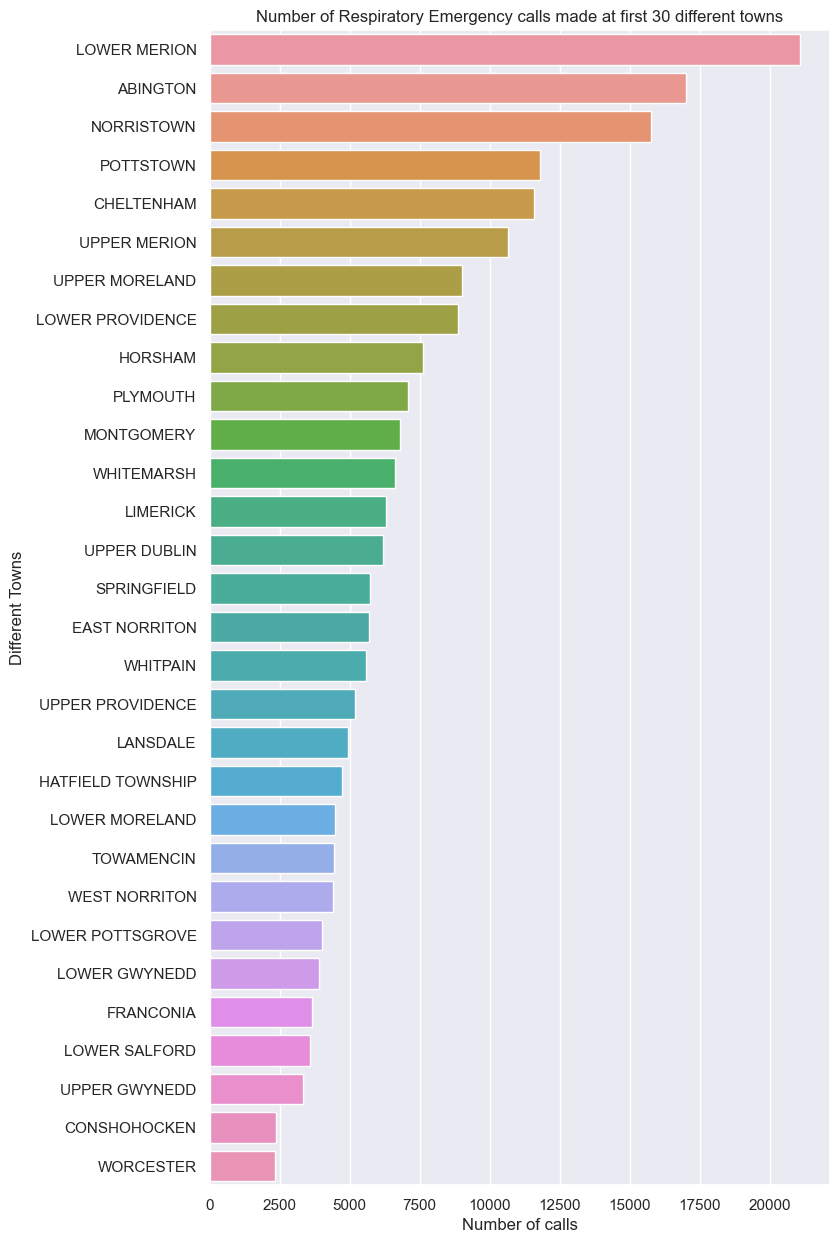

In [46]:
ResEmer= df[df['sub_category']=='RESPIRATORY EMERGENCY']['twp'] #Getting Respiratory Emergency calls as it is the highest
plt.figure(figsize=(8,15)) 
sns.countplot(y =df['twp'], data = ResEmer, order=df['twp'].value_counts().iloc[:30].index)
plt.xlabel("Number of calls")
plt.ylabel("Different Towns")
plt.title("Number of Respiratory Emergency calls made at first 30 different towns")

In [49]:
Traffic = df[df['category']=='Traffic']['sub_category']
(Traffic.value_counts()/len(Traffic)*100).head(10)  #No of calls made due to Traffic situations in percentage 

 VEHICLE ACCIDENT             68.485020
 DISABLED VEHICLE             19.068522
 ROAD OBSTRUCTION              8.198520
 HAZARDOUS ROAD CONDITIONS     2.702161
 VEHICLE FIRE                  1.257862
 VEHICLE LEAKING FUEL          0.166378
 DEBRIS/FLUIDS ON HIGHWAY      0.121538
Name: sub_category, dtype: float64

Text(0.5, 1.0, 'Number of calls made due to different traffic situations')

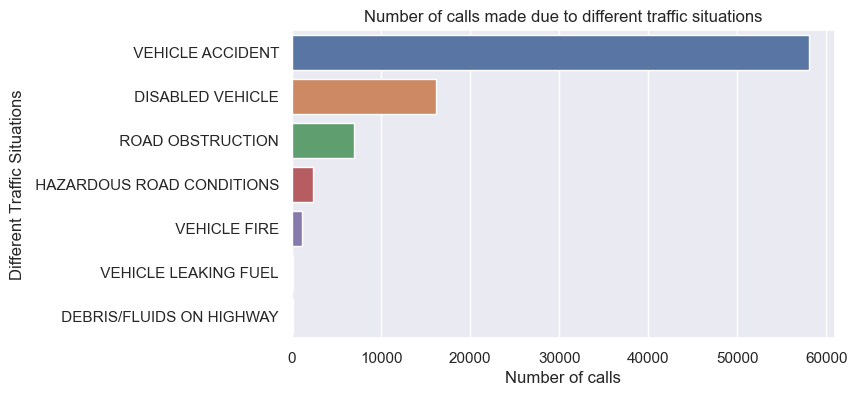

In [52]:
plt.figure(figsize=(7,4))
sns.countplot(y=Traffic, order=Traffic.value_counts().iloc[:10].index)
plt.xlabel("Number of calls")
plt.ylabel("Different Traffic Situations")
plt.title("Number of calls made due to different traffic situations")